# Overview

Functionality implemented so far:
1. Read excel files and plot raw traces of graphs
2. Find & calculate responding cells `calc_response_rate`
3. Graph max utp response for each slide
3. Plot average values for control groups vs. L89A overexpressed groups

TODO's:
** Please open an issue for anything that should be implemented! **

# Code

## Imports

In [1]:
# Import modules for working with excel sheets and for plotting

# matplotlib: module for plotting
# pandas: module for working with dataframe (can be imported from excel, csv, txt)
# %: ipython magic, to plot graphs in line
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re
%matplotlib inline

In [2]:
# `PLOT' is a global variable that needs to be set to `True' to actually plot things in this notebook
PLOT = True

## Load Data

The following dataset is NOT on GitHub. Make sure your local directory structure is as follows:

                    repository_directory
                     /        \        \
                    /          \        \
                  code        assets    other files (.gitignore, README.md, LICENSE.txt, ...)
                   /            \
                  /              \
    <jupyter_notebook_file>    <data_file>
    
Also, if you want to use the functions in this script with another dataset, make sure to change `number_of_rows` 
and the file name in the following import statements.

In [3]:
# Import excel file as a `pandas.ExcelFile' object (which basically has all sub-sheets in a big container!)
# also, only import 1302 rows
number_of_rows = 1302
ca_data = pd.ExcelFile('../assets/2018September11_23h49min14s_sorted_transformed_data.xlsx', nrows=number_of_rows)

## Functions

The following functions are used throughout this notebook to analyze and visualize data.
The doc-string should provide enough information on how they work. 
They basically encapsulate commonly used commands to make re-use easier!

In [4]:
# plot every single trace after reading subsheets and alphabetically sorting them
def plot_traces(df, plot=False):
    """
    this function takes a pandas.io.excel.ExcelFile object and iterates over all sheets
    every column of every such sheet is interpreted as a 'trace' and plotted in a line plot
    a new line plot is created for every sheet in the pandas.io.excel.ExcelFile object
    
    ------------------------------
    arguments:
    df        - input data (pandas.io.excel.ExcelFile)
    plot      - defaults to False, if True, plot line plots for every sheet in `df'
    """
    sheetnames = df.sheet_names.copy()
    sheetnames.sort()
    for sheetname in sheetnames: 
        temp = pd.read_excel(df, sheetname)
        if plot:
            temp.plot(title=sheetname, legend=False)

In [5]:
# Find percentage of responding cells per slide
# Find average according to grouping
def calc_response_rate(df, threshold=1.2, utp_range=(40,480), verbose=False, plot=False):
    """
    this function calculates the response rate for calcium imaging data sets
    it takes a pandas.io.excel.ExcelFile and iterates over all data sheets and 
    columns in the input data frames
    
    ------------------------------
    arguments:
    df        - input data (pandas.io.excel.ExcelFile)
    threshold - defaults to 1.2, the response threshold for your dataset
    utp_range - defaults to (40,480), a tuple indicating the range in which to look 
    verbose   - defaults to False, if True, verbose output is printed (use it to suppress output)
    plot      - defaults to False, if True, plot boxplots to visualize computations
    """
    sheetnames = df.sheet_names.copy()
    sheetnames.sort()
    counter = 0
    col_counter = 0
    appended_data = []
    for sheetname in sheetnames: 
        #print("this is a new sheet: {}".format(sheetname))
        selected_df = pd.read_excel(df, sheetname)[utp_range[0]:utp_range[1]]
        selected_df_max = selected_df.max()
        
        # counter in 1st but not 2nd loop so it's reset to 0 after every sheet but not after every column
        counter = 0
        col_counter = 0
        for idx in selected_df_max.index:
            col_counter += 1
            if selected_df_max[idx] >= threshold:
                pass
                # TODO: implement actual functionality
                # print("current idx: {}".format(idx))
                # print(utp_max[idx])
            else:
                counter = counter + 1 # shorthand for this is: counter += 1, in cool languages (computer languages): counter++
        
        d = {'Sheet name':[sheetname], 'Total cells':[col_counter], 'Non-responding': [counter],'Percentage responding': [100-(counter*100/col_counter)]}
        data=pd.DataFrame(d)
        appended_data.append(data)
    appended_data = pd.concat(appended_data,ignore_index=True) 
    if verbose:
        print(appended_data)
    if plot:
        appended_data.loc[0:5].boxplot()
        appended_data.loc[6:12].boxplot()
    if verbose:
        print('Statistics for control cells')
        print(appended_data.loc[0:5].mean())
        print('Statistics for L89A cells')
        print(appended_data.loc[6:12].mean())

## Exploratory Data Analysis (*EDA*)

In [6]:
# call the newly created `plot_traces' function (output is suppressed)
plot_traces(df=ca_data, plot=False)

# call the newly created `calc_response_rate' function (output is suppressed)        
calc_response_rate(df=ca_data, threshold=1.2, utp_range=(40, 480), verbose=False, plot=False)

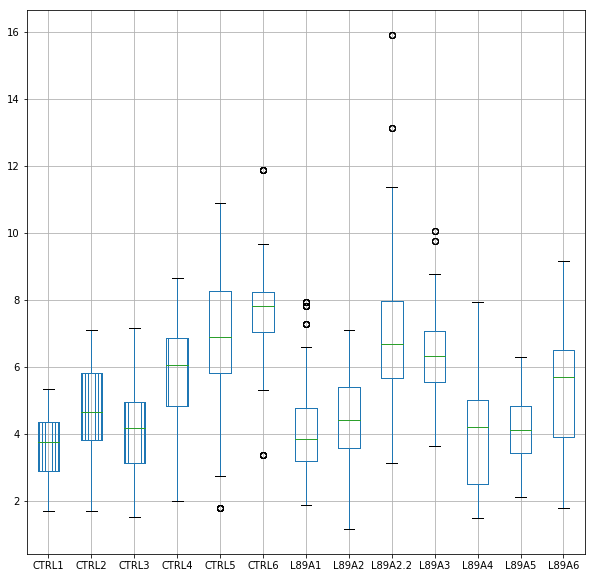

In [7]:
# Find max UTP response for each slide & plot (no threshold so far)
d = {}
sheetnames = ca_data.sheet_names.copy()
sheetnames.sort()
for sheetname in sheetnames: 
    # print("Sheet: {}".format(name))
    temp = pd.read_excel(ca_data, sheetname).max()
    d[sheetname] = temp
    if PLOT:
        pd.DataFrame(d).boxplot(figsize=(10,10))

   Sheet name  Max UTP response
0       CTRL1          3.590547
1       CTRL2          4.629974
2       CTRL3          4.076675
3       CTRL4          5.815918
4       CTRL5          6.898256
5       CTRL6          7.632217
6       L89A1          4.220858
7       L89A2          4.427743
8     L89A2.2          7.094816
9       L89A3          6.349200
10      L89A4          3.950152
11      L89A5          4.209603
12      L89A6          5.316882
Statistics for control cells
Max UTP response    5.810608
dtype: float64


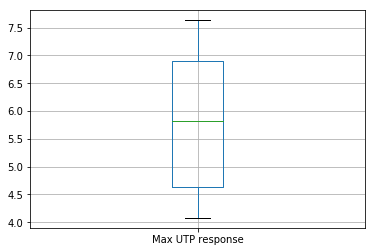

In [8]:
# Find max UTP response for each group & plot (no threshold so far)
sheetnames = ca_data.sheet_names.copy()
sheetnames.sort()
appended_data = []
for sheetname in sheetnames: 
    temp = pd.read_excel(ca_data, sheetname).max()
    d = {'Sheet name':[sheetname], 'Max UTP response':[temp.mean()]}
    d_utp_max = pd.DataFrame(d)
    # print(d_utp_max)
    appended_data.append(d_utp_max)
appended_data = pd.concat(appended_data,ignore_index=True) 
print(appended_data)

if PLOT:
    appended_data.loc[1:5].boxplot()
    print('Statistics for control cells')
    print(appended_data.loc[1:5].mean())

Statistics for L89A cells
Max UTP response    4.956459
dtype: float64


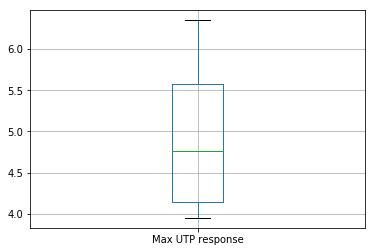

In [9]:
if PLOT:
    print('Statistics for L89A cells')
    print(appended_data.loc[9:12].mean())
    appended_data.loc[9:12].boxplot()

In [10]:
#(#!/Library/Frameworks/Python.framework/Versions/3.7/bin/python3
# this example demonstrates how to use regular
# expressions in python
import re

# Step 1: compile a regular expression and assign it to a variable
pattern = re.compile("CTRL[0-9]*")

# Step 2: use the `.match' method on the pattern to match the
# regex against a string
# `None' is returned if no match was found, otherwise a
# `match' object is returned
# this, the following line of code can be used in an `if' clause
print(pattern.match("CTRL1"))  # this should match
print(pattern.match("CTR"))  # this should not match)

<_sre.SRE_Match object; span=(0, 5), match='CTRL1'>
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Columns: 295 entries, R50 W3 Avg to R64 W3 Avg
dtypes: float64(295)
memory usage: 2.9 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Columns: 342 entries, R47 W3 Avg to R23 W3 Avg
dtypes: float64(342)
memory usage: 3.3 MB
None


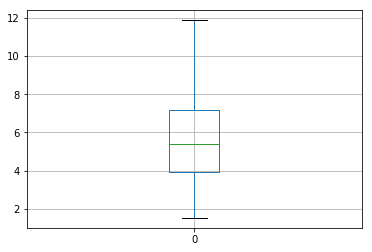

In [11]:
#Find and combine sheets of the same categories

d = {}
sheetnames = ca_data.sheet_names.copy()
sheetnames.sort()
df_control = pd.DataFrame() #Assign to empty dataframe
df_l89a = pd.DataFrame()

# Step 1: compile a regular expression and assign it to a variable
pattern_control = re.compile("CTRL[0-9]*")
for sheetname in sheetnames:
    #print(pattern_control.match(sheetname))
    if pattern_control.match(sheetname):
        select_control = pd.read_excel(ca_data, sheetname)
        df_control = pd.concat([df_control, select_control],axis=1)
        
    else:
        select_l89a = pd.read_excel(ca_data, sheetname)
        df_l89a = pd.concat([df_l89a, select_l89a],axis=1)
print(df_control.info())
print(df_l89a.info())

if PLOT:
    pd.DataFrame(df_control.max()).boxplot()

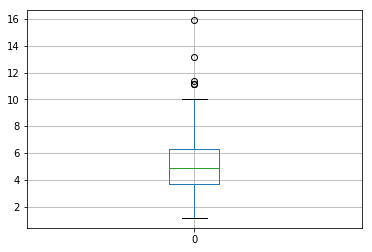

In [12]:
if PLOT:
    pd.DataFrame(df_l89a.max()).boxplot()

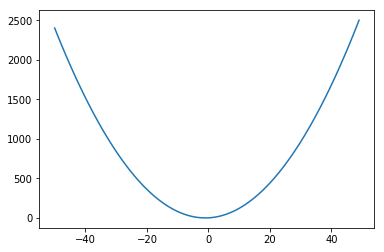

Area under the curve is: [161650.5]


In [29]:
#Find area under the curve
#Draw a quadratic curve
a=[]
b=[]
# y=0
# x=-50

for x in range(-50,50,1):
    y=x**2+2*x+2
    a.append(x)
    b.append(y)
    #x= x+1

fig= plt.figure()
axes=fig.add_subplot(111)
axes.plot(a,b)
plt.show()

#Find area under the curve ysing trapezoid rule
import numpy as np
from scipy.integrate import simps
from numpy import trapz

auc = np.trapz([a],[b])
print("Area under the curve is:",auc)
